In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import utils
import pandas as pd
import seaborn as sns
from functools import partial
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from scipy import stats

In [6]:
df = pd.read_csv("data/therapeutic_touch.csv")
df.head()

,y,s
0,1,S01
1,0,S01
2,0,S01
3,0,S01
4,0,S01


In [7]:
df['s'] = df['s'].astype("category")

In [34]:
with model1:
    prior = pm.sample_prior_predictive()
az.plot_posterior(utils.sigmoid(prior.prior["alpha"]), group="prior")

array([[<AxesSubplot:title={'center':'alpha\nS01'}>,
        <AxesSubplot:title={'center':'alpha\nS02'}>,
        <AxesSubplot:title={'center':'alpha\nS03'}>,
        <AxesSubplot:title={'center':'alpha\nS04'}>],
       [<AxesSubplot:title={'center':'alpha\nS05'}>,
        <AxesSubplot:title={'center':'alpha\nS06'}>,
        <AxesSubplot:title={'center':'alpha\nS07'}>,
        <AxesSubplot:title={'center':'alpha\nS08'}>],
       [<AxesSubplot:title={'center':'alpha\nS09'}>,
        <AxesSubplot:title={'center':'alpha\nS10'}>,
        <AxesSubplot:title={'center':'alpha\nS11'}>,
        <AxesSubplot:title={'center':'alpha\nS12'}>],
       [<AxesSubplot:title={'center':'alpha\nS13'}>,
        <AxesSubplot:title={'center':'alpha\nS14'}>,
        <AxesSubplot:title={'center':'alpha\nS15'}>,
        <AxesSubplot:title={'center':'alpha\nS16'}>],
       [<AxesSubplot:title={'center':'alpha\nS17'}>,
        <AxesSubplot:title={'center':'alpha\nS18'}>,
        <AxesSubplot:title={'center':'alph

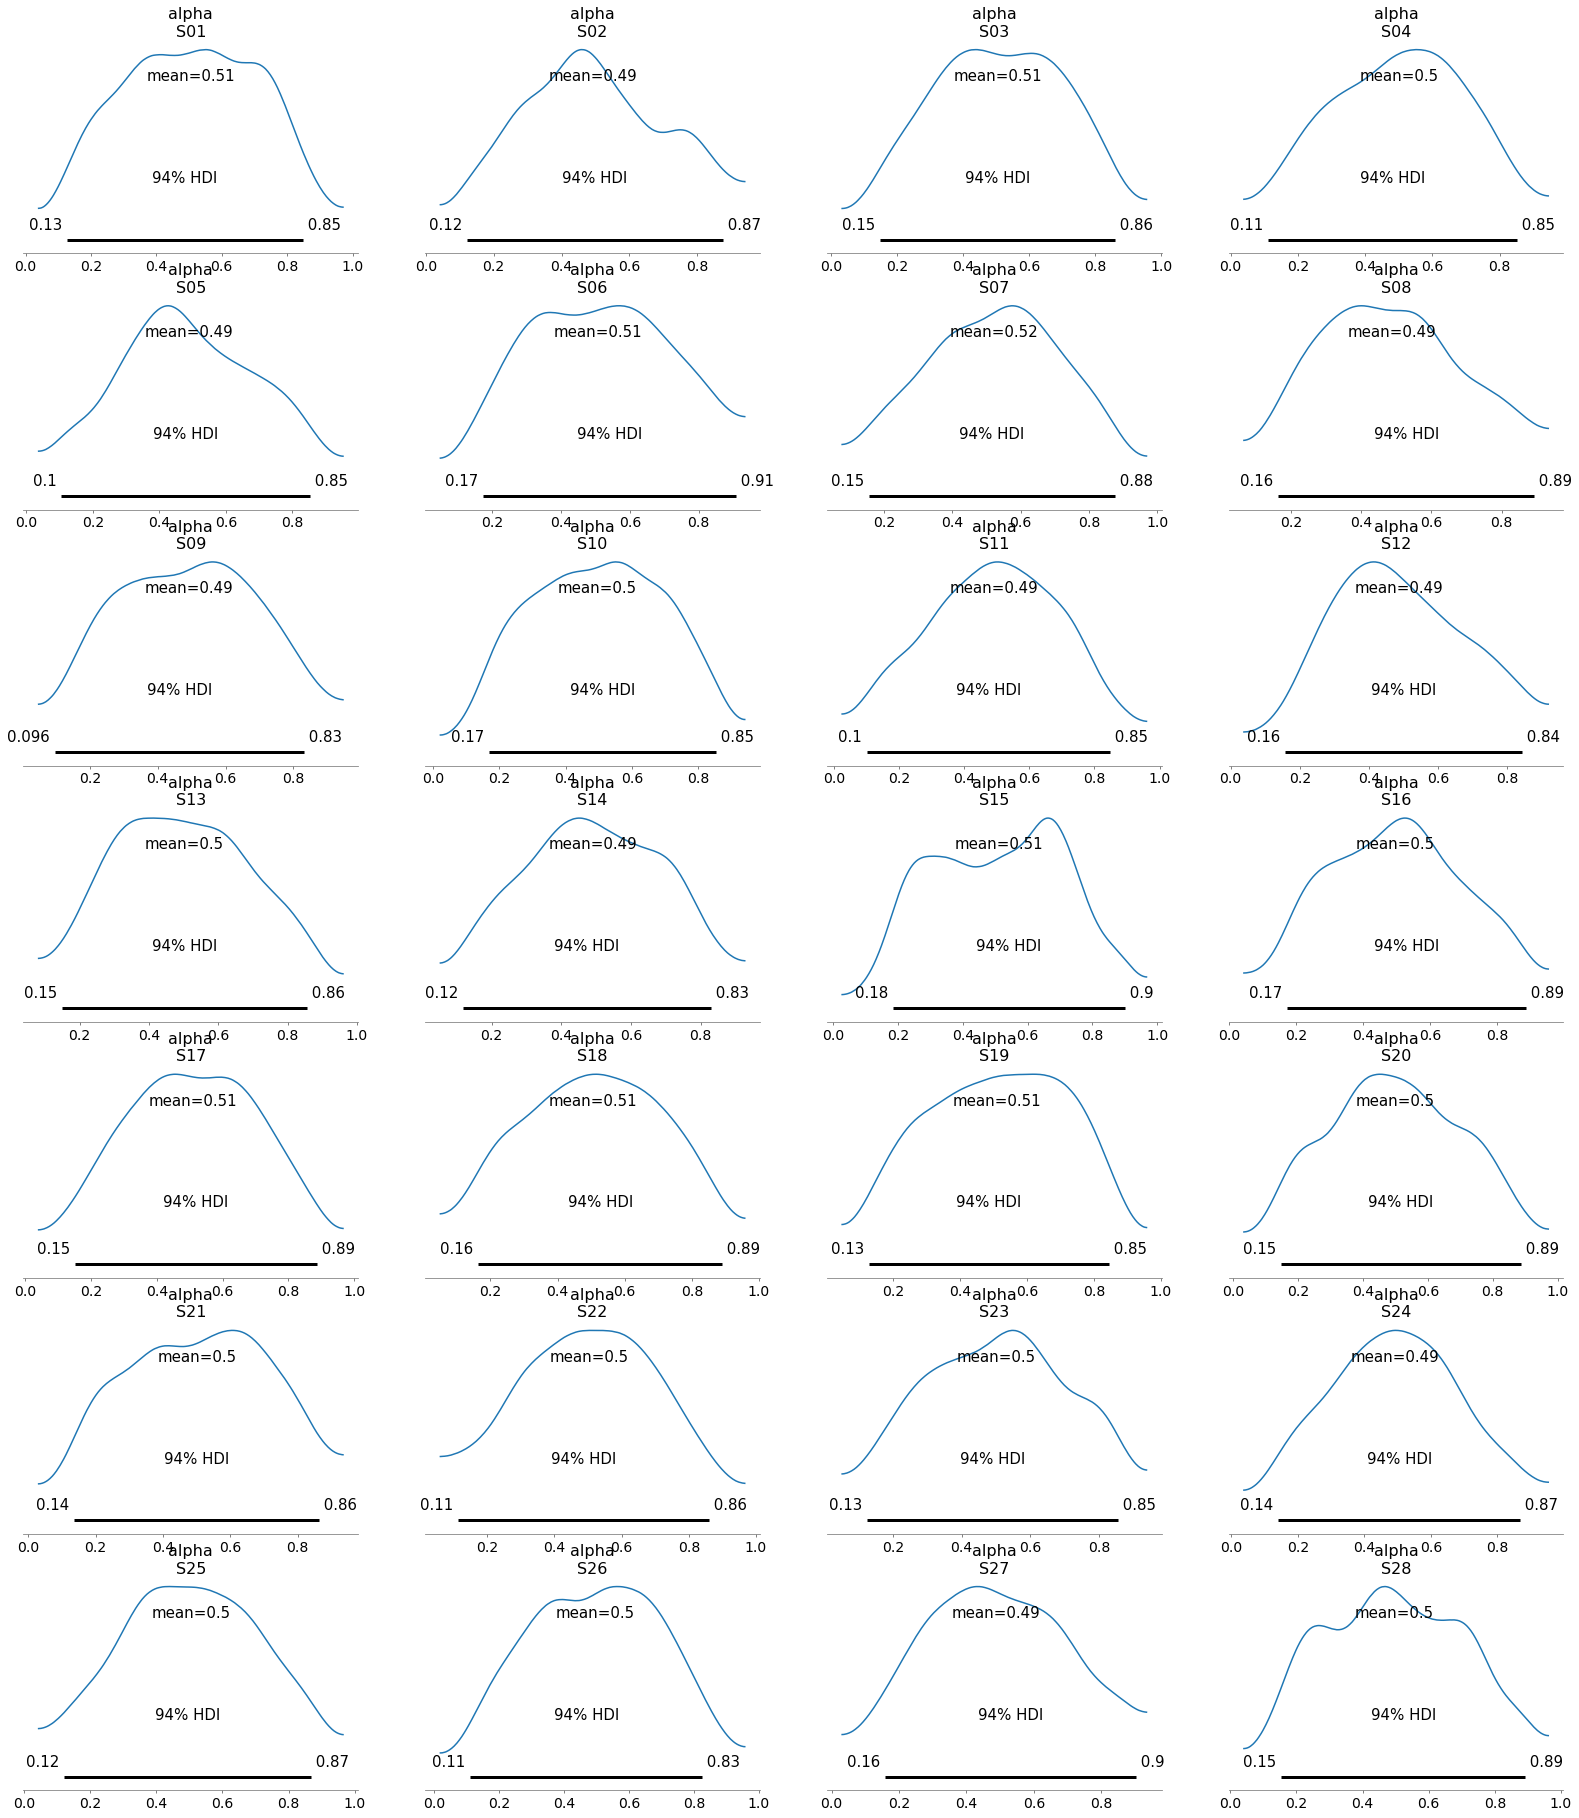

In [91]:
coords = {
    "subject_dim": df.s.cat.categories
}

with pm.Model(coords=coords) as model1:

    sigma = pm.Exponential("sigma", 10)
    alpha_bar = pm.Normal("alpha_population", mu=0, sigma=.5)
    alpha = pm.Normal("alpha", mu=0, sigma=1, dims="subject_dim")

    p = pm.math.sigmoid(alpha[df.s.cat.codes] * sigma + alpha_bar)
    p = pm.Deterministic("p", p)
    y_hat = pm.Bernoulli("y_hat", p=p, observed=df["y"])
    trace1 = pm.sample(chains=4)

    # prior = pm.sample_prior_predictive()
# az.plot_posterior(utils.sigmoid(prior.prior["alpha"]), group="prior")
None

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha_population, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7194, but should be close to 0.8. Try to increase the number of tuning steps.


In [92]:
az.summary(trace1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_population,-0.231,0.121,-0.450,-0.000,0.002,0.002,3629.0,2707.0,1.0
alpha[S01],-0.300,0.998,-2.160,1.623,0.016,0.016,4033.0,2648.0,1.0
alpha[S02],-0.209,1.032,-2.090,1.777,0.016,0.018,3931.0,2689.0,1.0
alpha[S03],-0.130,1.004,-1.954,1.781,0.015,0.017,4326.0,2066.0,1.0
alpha[S04],-0.122,0.957,-1.906,1.692,0.016,0.017,3766.0,2467.0,1.0
...,...,...,...,...,...,...,...,...,...
p[275],0.456,0.047,0.369,0.538,0.001,0.001,3012.0,2432.0,1.0
p[276],0.456,0.047,0.369,0.538,0.001,0.001,3012.0,2432.0,1.0
p[277],0.456,0.047,0.369,0.538,0.001,0.001,3012.0,2432.0,1.0
p[278],0.456,0.047,0.369,0.538,0.001,0.001,3012.0,2432.0,1.0


array([[<AxesSubplot:title={'center':'alpha_population'}>,
        <AxesSubplot:title={'center':'alpha_population'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

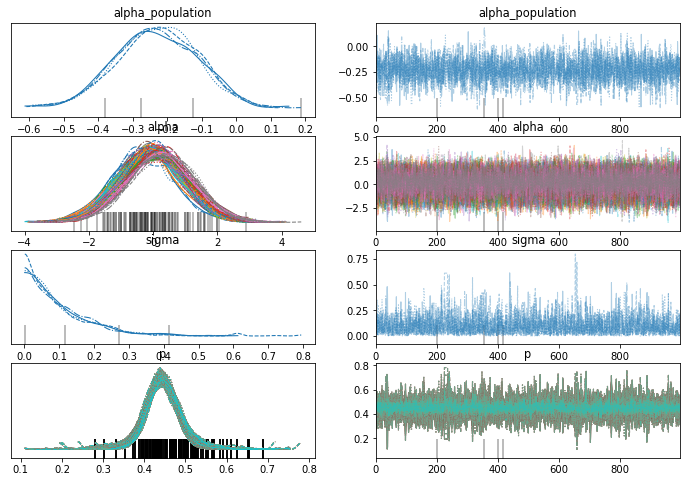

In [93]:
az.plot_trace(trace1)

/Users/alvaro/miniforge3/envs/rethinking/lib/python3.10/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (310) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha_population'}>,
        <AxesSubplot:title={'center':'alpha\nS01'}>,
        <AxesSubplot:title={'center':'alpha\nS02'}>,
        <AxesSubplot:title={'center':'alpha\nS03'}>],
       [<AxesSubplot:title={'center':'alpha\nS04'}>,
        <AxesSubplot:title={'center':'alpha\nS05'}>,
        <AxesSubplot:title={'center':'alpha\nS06'}>,
        <AxesSubplot:title={'center':'alpha\nS07'}>],
       [<AxesSubplot:title={'center':'alpha\nS08'}>,
        <AxesSubplot:title={'center':'alpha\nS09'}>,
        <AxesSubplot:title={'center':'alpha\nS10'}>,
        <AxesSubplot:title={'center':'alpha\nS11'}>],
       [<AxesSubplot:title={'center':'alpha\nS12'}>,
        <AxesSubplot:title={'center':'alpha\nS13'}>,
        <AxesSubplot:title={'center':'alpha\nS14'}>,
        <AxesSubplot:title={'center':'alpha\nS15'}>],
       [<AxesSubplot:title={'center':'alpha\nS16'}>,
        <AxesSubplot:title={'center':'alpha\nS17'}>,
        <AxesSubplot:title={'center'

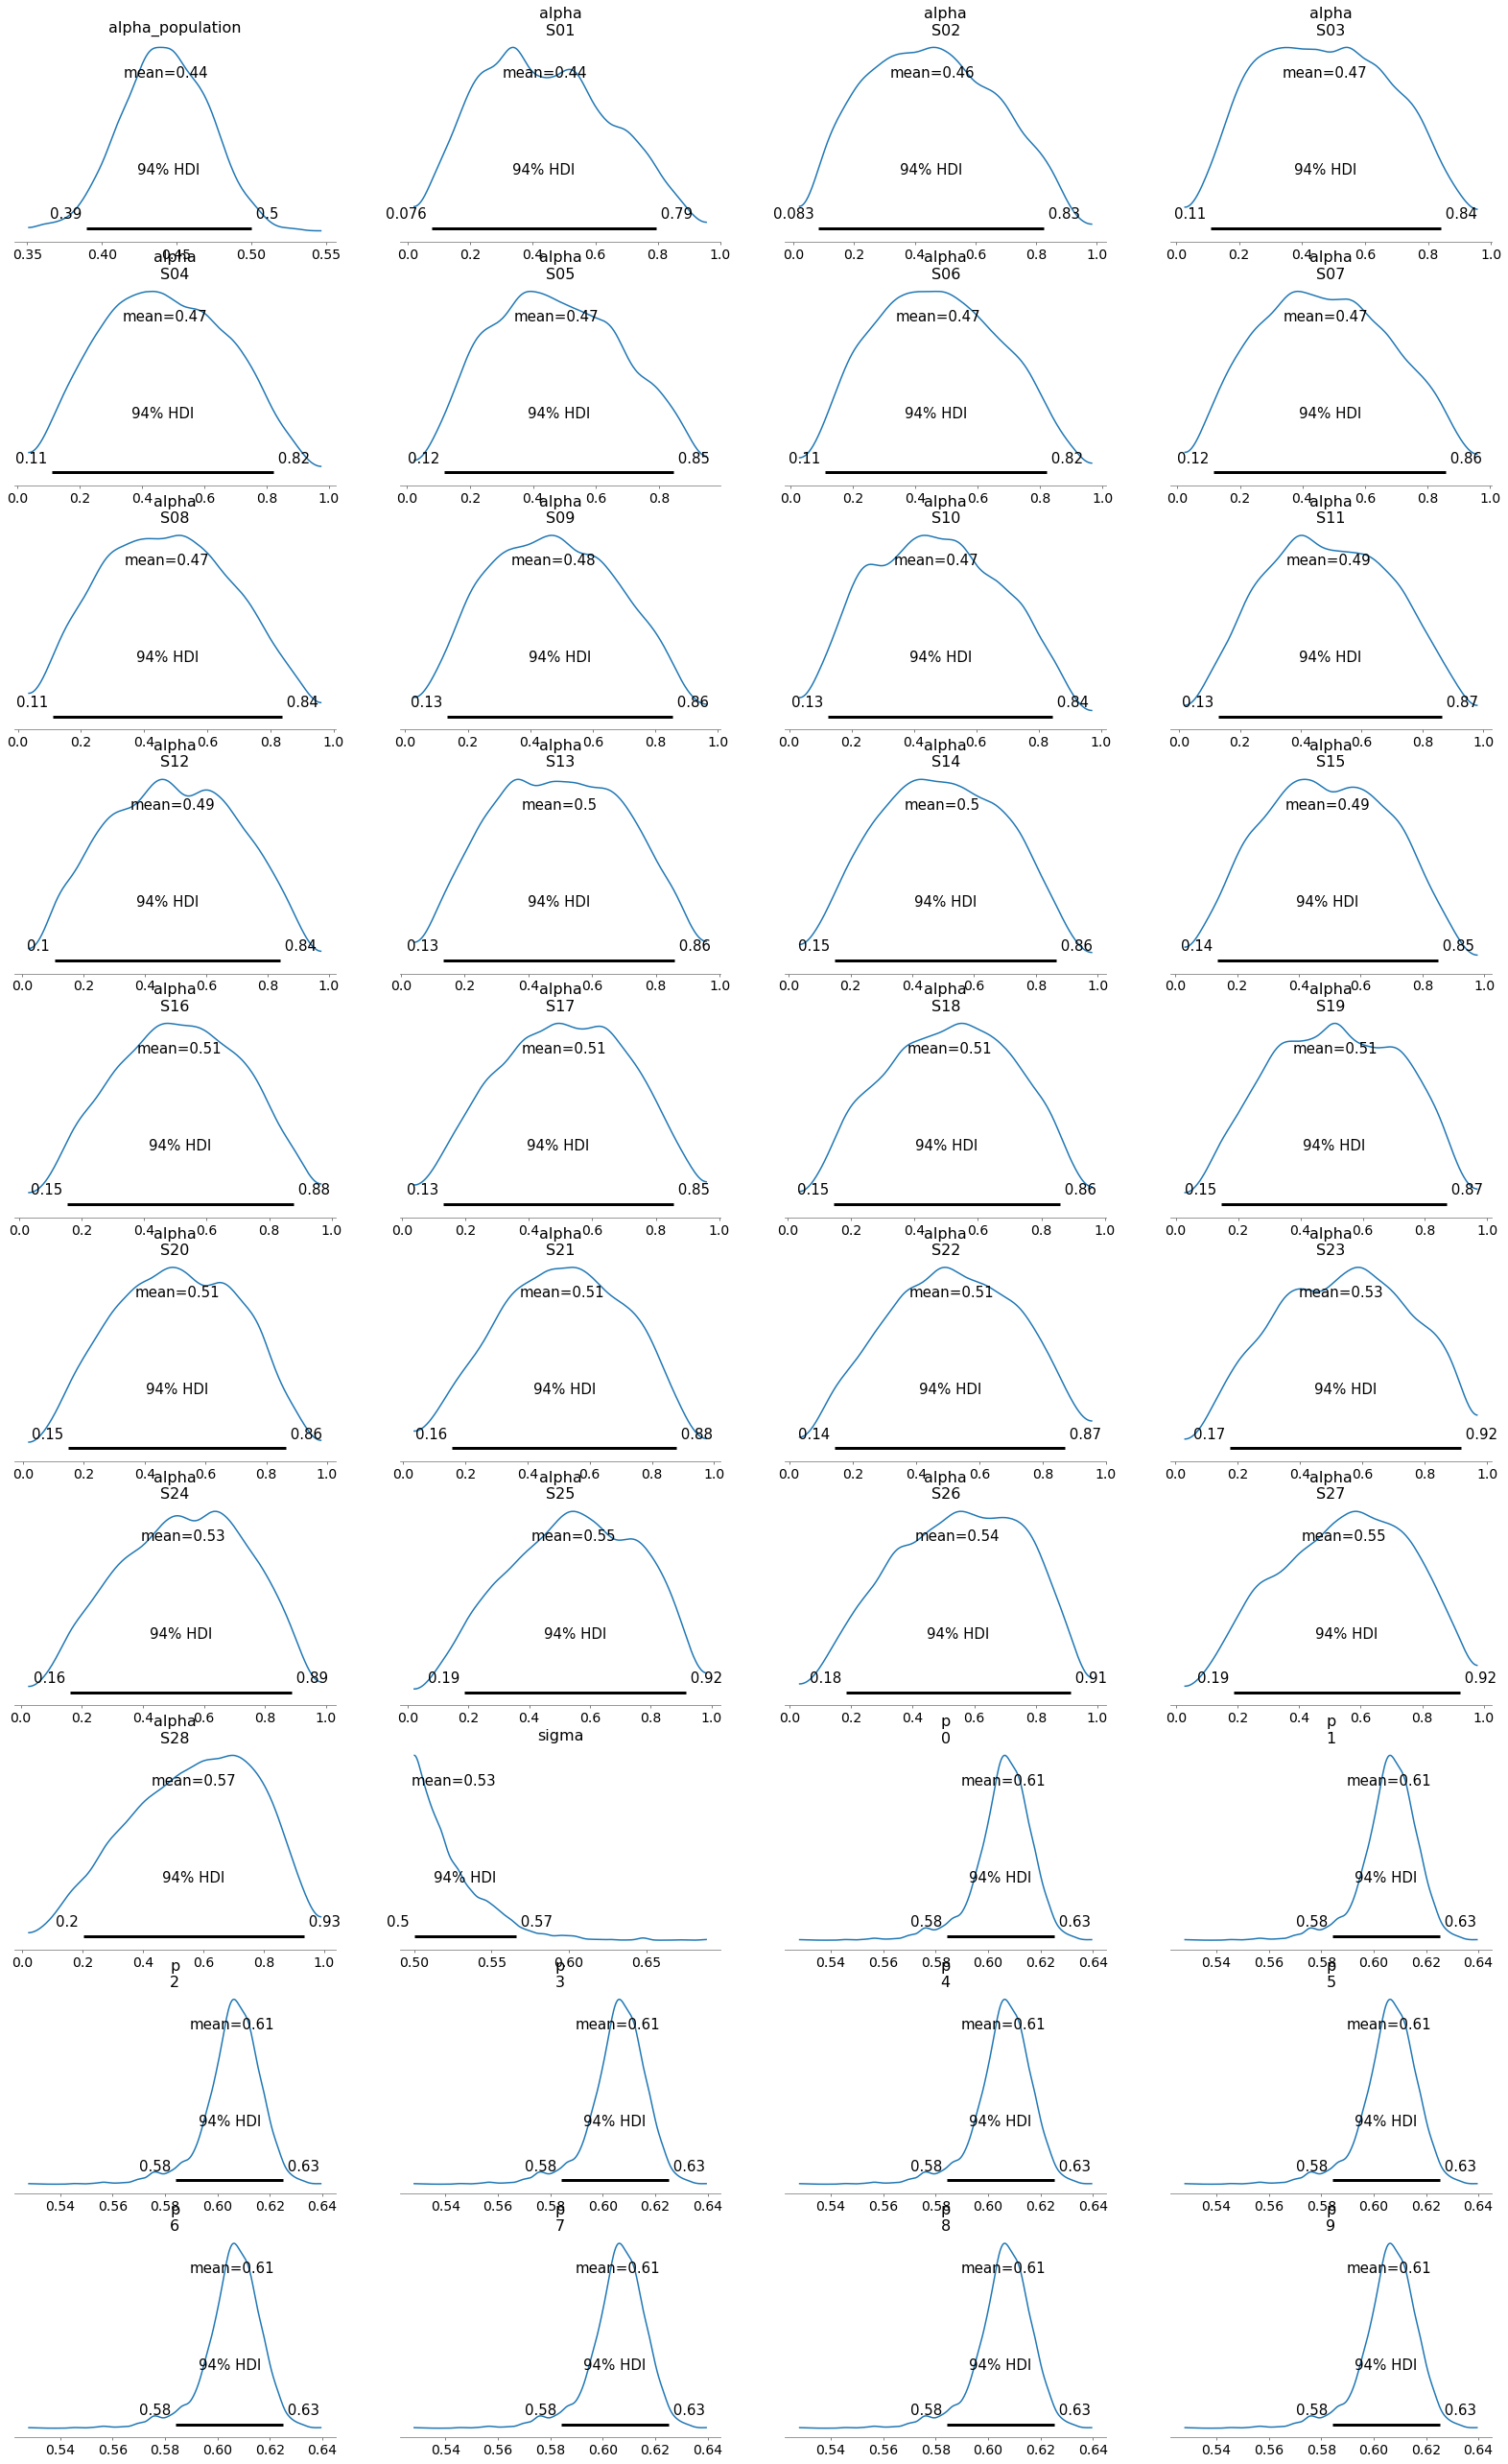

In [94]:
az.plot_posterior(utils.sigmoid(trace1.posterior))

do not exist

In [85]:
coords = {
    "subject_dim": df.s.cat.categories
}

with pm.Model(coords=coords) as model2:
    population_mode = pm.Beta("population_mode", alpha=4, beta=4)

    _kappa_mu = pm.HalfNormal("_kappa_mu", 10)
    _kappa_sigma = pm.Exponential("_kappa_sigma", 10)
    population_concentration_minus2 = pm.Gamma("population_concentration_minus2", mu=_kappa_mu, sigma=_kappa_sigma)

    population_concentration = population_concentration_minus2 + 2
    population_concentration = pm.Deterministic("population_concentration", population_concentration)

    p = pm.Beta("mode",
        alpha=population_mode*(population_concentration-2)+1,
        beta=(1-population_mode)*(population_concentration-2)+1,
        dims="subject_dim"
    )


    y_hat = pm.Bernoulli("y_hat", p[df.s.cat.codes], observed=df["y"])
    # prior = pm.sample_prior_predictive()
    trace2 = pm.sample(chains=4)


# az.plot_posterior(prior, group="prior")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [population_mode, _kappa_mu, _kappa_sigma, population_concentration_minus2, mode]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.
There were 233 divergences after tuning. Increase `target_accept` or reparameterize.
There were 182 divergences after tuning. Increase `target_accept` or reparameterize.
There were 179 divergences after tuning. Increase `target_accept` or reparameterize.
There were 248 divergences after tuning. Increase `target_accept` or reparameterize.


In [86]:
az.summary(trace2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
population_mode,0.433,0.045,0.352,0.520,0.001,0.001,988.0,1602.0,1.00
_kappa_mu,12.836,5.373,3.968,23.214,0.194,0.137,763.0,1270.0,1.00
_kappa_sigma,0.158,0.105,0.025,0.353,0.003,0.002,992.0,614.0,1.00
population_concentration_minus2,12.841,5.374,3.826,23.101,0.194,0.137,763.0,1272.0,1.00
mode[S01],0.299,0.101,0.106,0.484,0.003,0.002,1504.0,897.0,1.00
mode[S02],0.342,0.100,0.156,0.526,0.002,0.002,1814.0,2213.0,1.00
mode[S03],0.385,0.103,0.201,0.579,0.002,0.002,2018.0,2074.0,1.00
mode[S04],0.379,0.103,0.205,0.589,0.002,0.002,1671.0,1949.0,1.00
mode[S05],0.382,0.102,0.201,0.574,0.002,0.002,2211.0,1478.0,1.00
mode[S06],0.383,0.099,0.209,0.582,0.002,0.001,2931.0,2009.0,1.00


array([[<AxesSubplot:title={'center':'population_mode'}>,
        <AxesSubplot:title={'center':'_kappa_mu'}>,
        <AxesSubplot:title={'center':'_kappa_sigma'}>],
       [<AxesSubplot:title={'center':'population_concentration_minus2'}>,
        <AxesSubplot:title={'center':'mode\nS01'}>,
        <AxesSubplot:title={'center':'mode\nS02'}>],
       [<AxesSubplot:title={'center':'mode\nS03'}>,
        <AxesSubplot:title={'center':'mode\nS04'}>,
        <AxesSubplot:title={'center':'mode\nS05'}>],
       [<AxesSubplot:title={'center':'mode\nS06'}>,
        <AxesSubplot:title={'center':'mode\nS07'}>,
        <AxesSubplot:title={'center':'mode\nS08'}>],
       [<AxesSubplot:title={'center':'mode\nS09'}>,
        <AxesSubplot:title={'center':'mode\nS10'}>,
        <AxesSubplot:title={'center':'mode\nS11'}>],
       [<AxesSubplot:title={'center':'mode\nS12'}>,
        <AxesSubplot:title={'center':'mode\nS13'}>,
        <AxesSubplot:title={'center':'mode\nS14'}>],
       [<AxesSubplot:title=

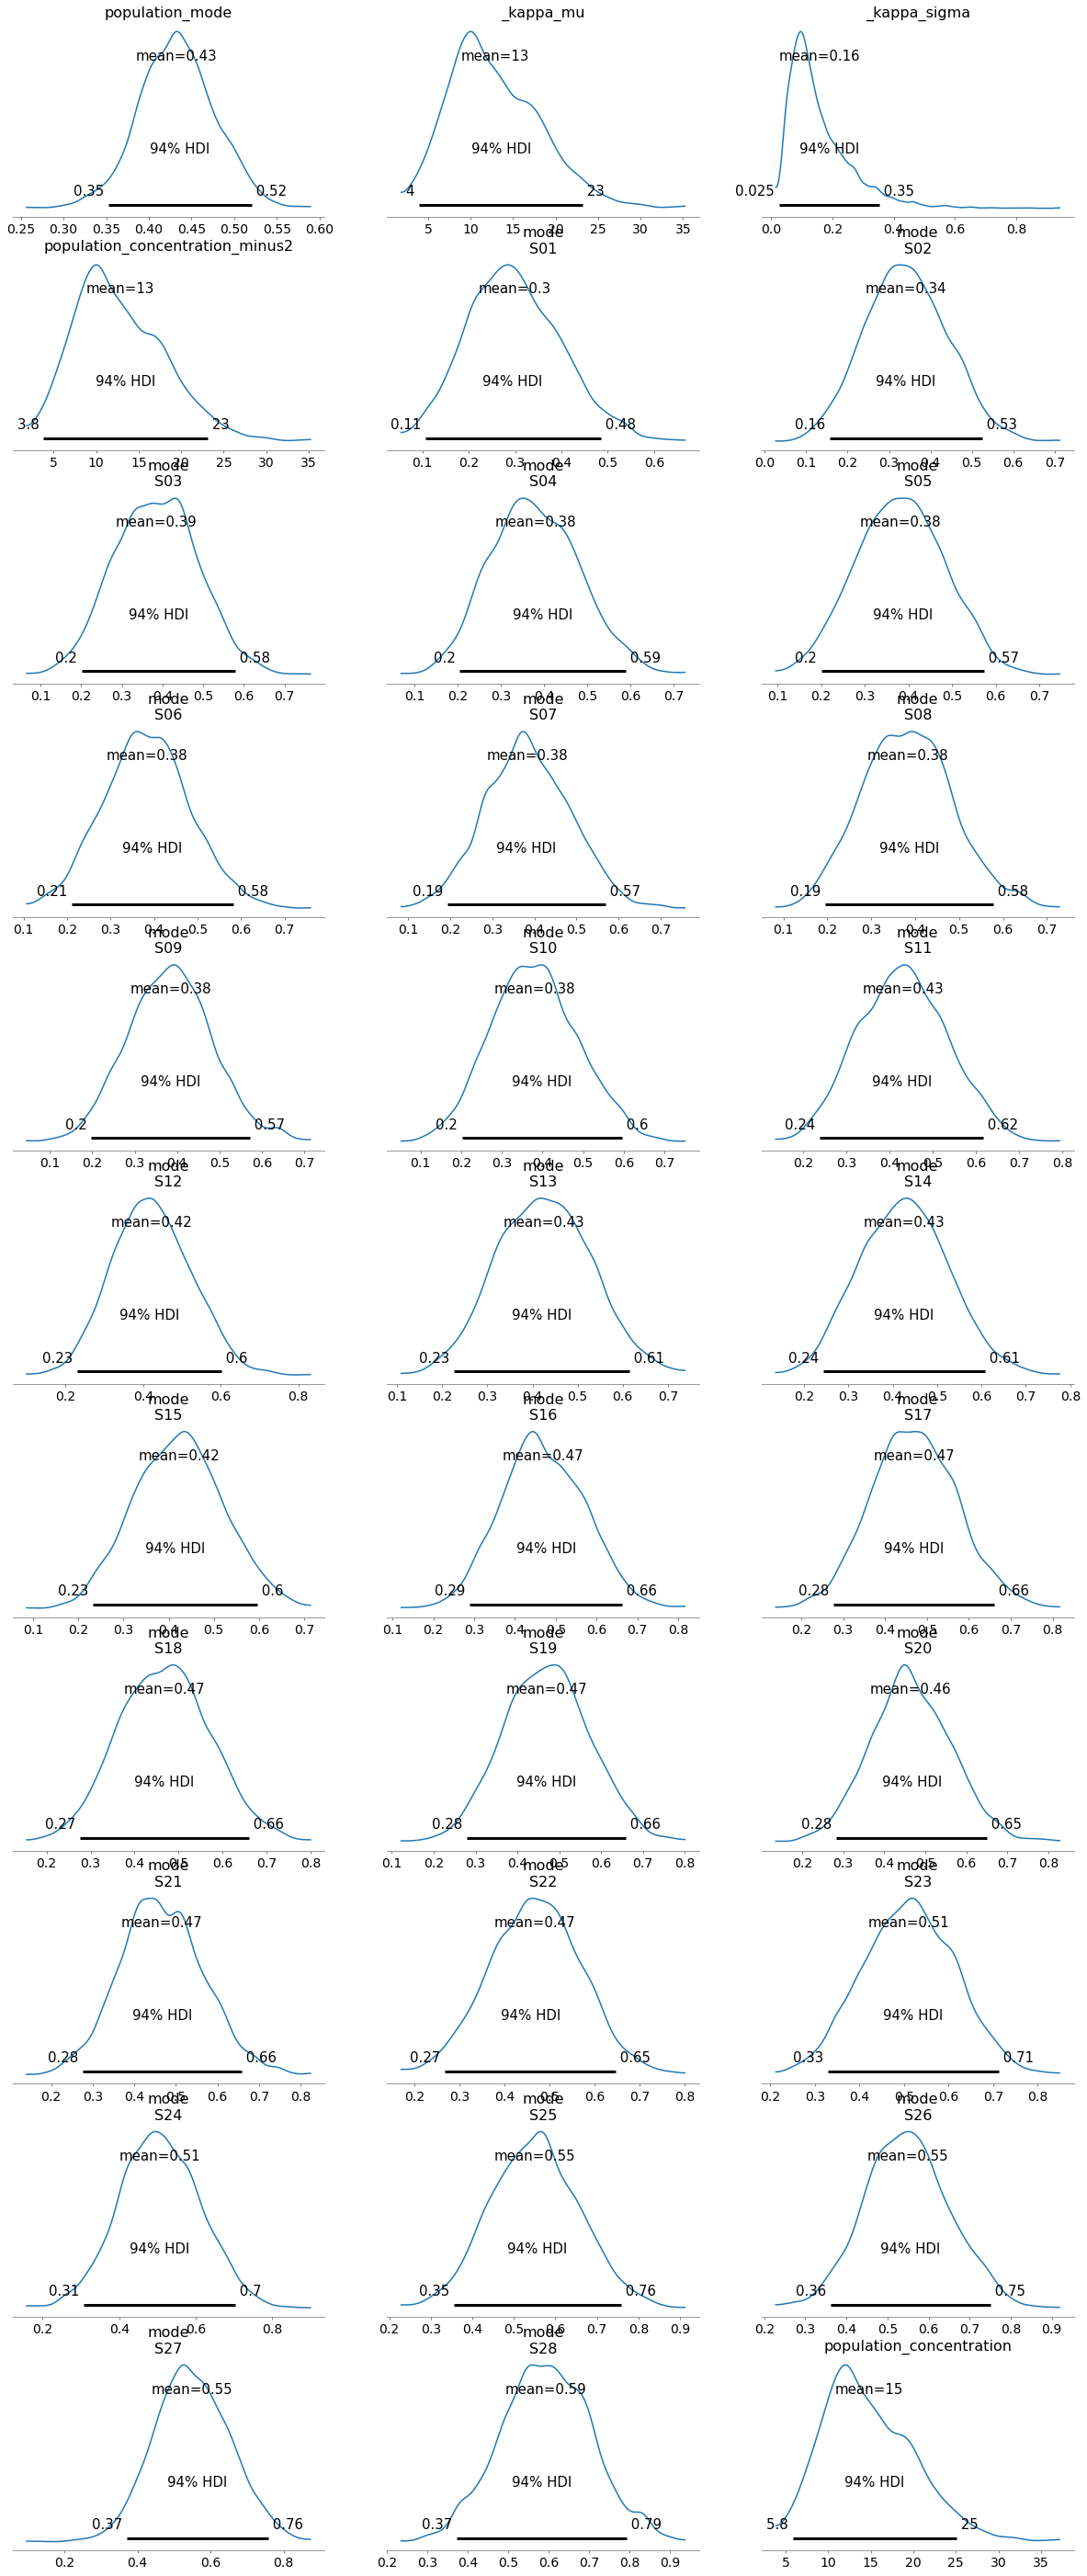

In [87]:
az.plot_posterior(trace2)

In [90]:

az.compare({"model1": trace1, "model2": trace2})

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model1,0,-193.029348,3.494899,0.000000,1.000000e+00,1.999321,0.000000,False,log
model2,1,-194.839994,12.969487,1.810646,2.220446e-16,3.103731,1.915919,False,log
